In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

- Dataset Glossary (Column-wise)
- Patient ID - Unique identifier for each patient
- Age - Age of the patient
- Sex - Gender of the patient (Male/Female)
- Cholesterol - Cholesterol levels of the patient
- Blood Pressure - Blood pressure of the patient (systolic/diastolic)
- Heart Rate - Heart rate of the patient
- Diabetes - Whether the patient has diabetes (Yes/No)
- Family History - Family history of heart-related problems (1: Yes, 0: No)
- Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
- Exercise Hours Per Week - Number of exercise hours per week
- Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use - Medication usage by the patient (1: Yes, 0: No)
- Stress Level - Stress level reported by the patient (1-10)
- Sedentary Hours Per Day - Hours of sedentary activity per day
- Income - Income level of the patient
- BMI - Body Mass Index (BMI) of the patient
- Triglycerides - Triglyceride levels of the patient
- Physical Activity Days Per Week - Days of physical activity per week
- Sleep Hours Per Day - Hours of sleep per day
- Country - Country of the patient
- Continent - Continent where the patient resides
- Hemisphere - Hemisphere where the patient resides
- Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)


In [3]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns', None)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])
df = df.drop(columns = ['Blood Pressure'])

In [7]:
numerical_features = [i for i in df.columns if df[i].dtype != 'object']
categorical_features = [i for i in df.columns if df[i].dtype == 'object']
print(numerical_features)
print(categorical_features)

['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic', 'Diastolic']
['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']


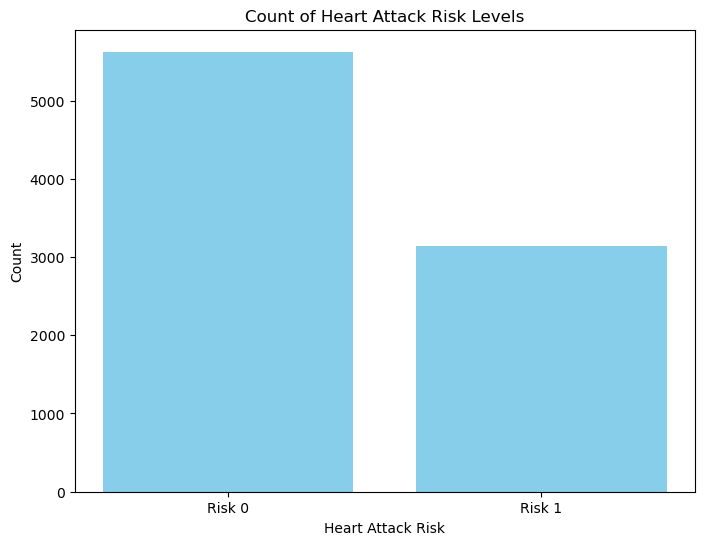

In [8]:
risk_counts = df['Heart Attack Risk'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.title('Count of Heart Attack Risk Levels')
plt.xticks(ticks=risk_counts.index, labels=[f'Risk {i}' for i in risk_counts.index])
plt.show()

In [9]:
def count_outliers(df):
    # Initialize a dictionary to hold the number of outliers for each feature
    outliers_count = {}
    
    # Select only numerical features
    df_numeric = df.select_dtypes(include=['number'])
    
    # Loop over each numerical feature
    for feature in df_numeric.columns:
        # Select the feature column
        column_data = df_numeric[feature]
        
        # Calculate IQR for the feature
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (column_data < lower_bound) | (column_data > upper_bound)
        
        # Count the number of outliers
        outliers_count[feature] = outliers.sum()
    
    return outliers_count
outliers_count = count_outliers(df)

print("Number of Outliers per Feature:")
print(outliers_count)

Number of Outliers per Feature:
{'Age': 0, 'Cholesterol': 0, 'Heart Rate': 0, 'Diabetes': 0, 'Family History': 0, 'Smoking': 904, 'Obesity': 0, 'Alcohol Consumption': 0, 'Exercise Hours Per Week': 0, 'Previous Heart Problems': 0, 'Medication Use': 0, 'Stress Level': 0, 'Sedentary Hours Per Day': 0, 'Income': 0, 'BMI': 0, 'Triglycerides': 0, 'Physical Activity Days Per Week': 0, 'Sleep Hours Per Day': 0, 'Heart Attack Risk': 0, 'Systolic': 0, 'Diastolic': 0}


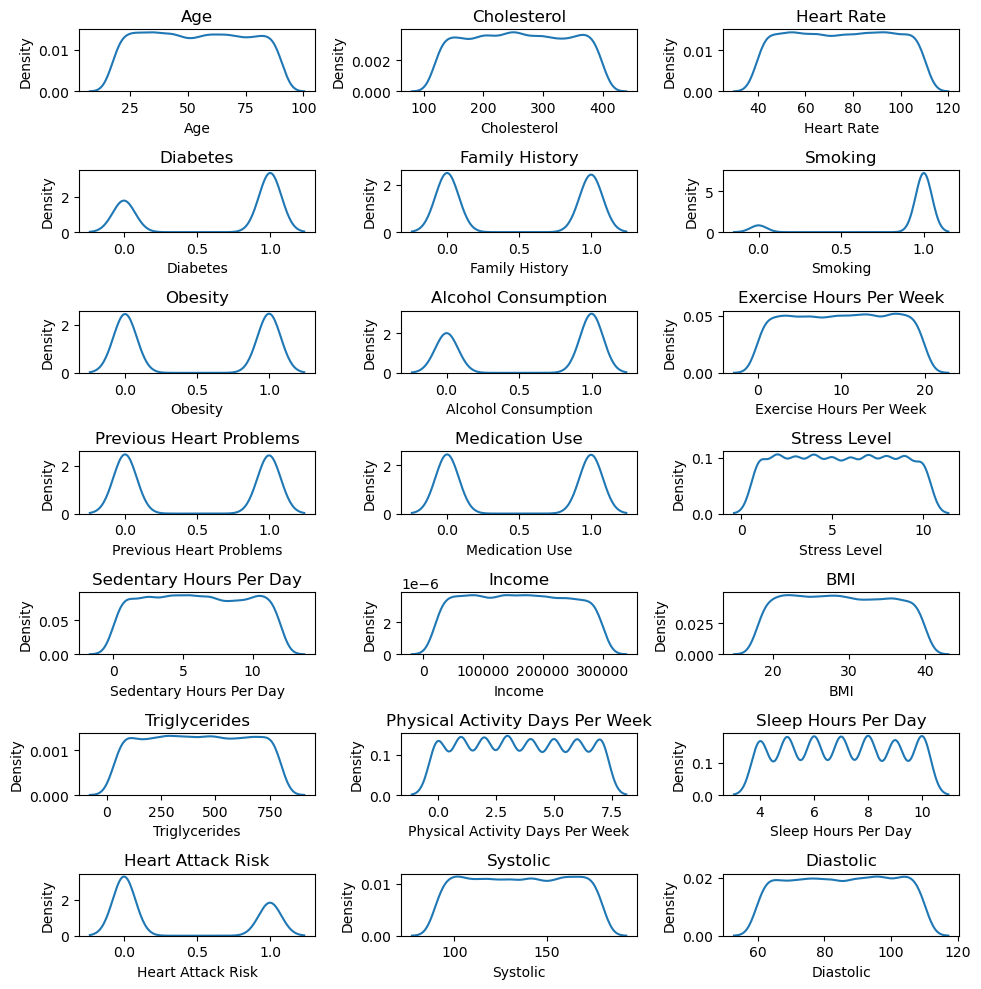

In [10]:
df_21 = df[numerical_features]
num_columns = len(df_21.columns)
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(10,10))

for i, col in enumerate(df_21.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.kdeplot(df_21[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

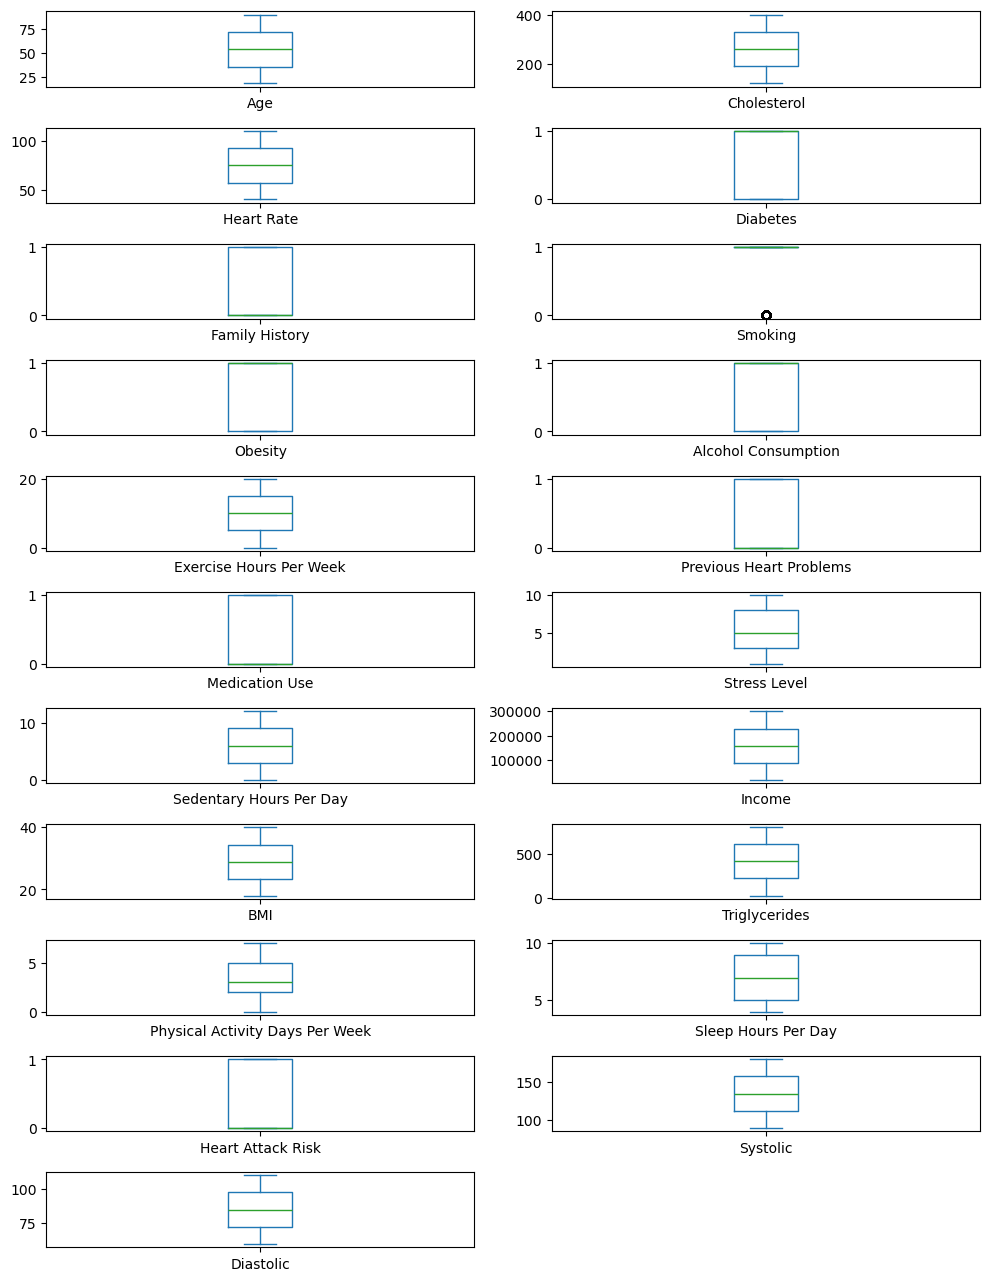

In [11]:
df.plot(kind='box', subplots=True, layout=(int(len(df.columns)/2), 2), figsize=(10, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [12]:
df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


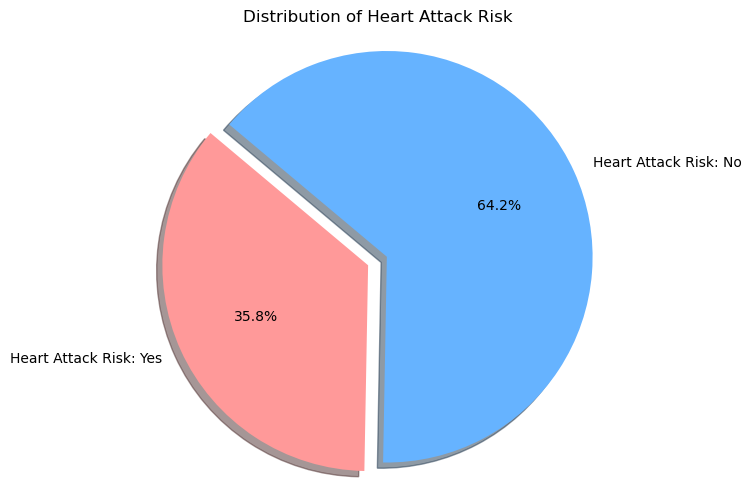

In [13]:
yes_percentage = len(df[df['Heart Attack Risk'] == 1]) / len(df) * 100
no_percentage = len(df[df['Heart Attack Risk'] == 0]) / len(df) * 100

# Data for the pie chart
labels = ['Heart Attack Risk: Yes', 'Heart Attack Risk: No']
sizes = [yes_percentage, no_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Heart Attack Risk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [14]:
for i in df.columns:
    if len(df[i].unique()) < 11:
        print(i,df[i].unique(), 'len =', len(df[i].unique()))


Sex ['Male' 'Female'] len = 2
Diabetes [0 1] len = 2
Family History [0 1] len = 2
Smoking [1 0] len = 2
Obesity [0 1] len = 2
Alcohol Consumption [0 1] len = 2
Diet ['Average' 'Unhealthy' 'Healthy'] len = 3
Previous Heart Problems [0 1] len = 2
Medication Use [0 1] len = 2
Stress Level [ 9  1  6  2  7  4  5  8 10  3] len = 10
Physical Activity Days Per Week [0 1 4 3 5 6 7 2] len = 8
Sleep Hours Per Day [ 6  7  4  5 10  8  9] len = 7
Continent ['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia'] len = 6
Hemisphere ['Southern Hemisphere' 'Northern Hemisphere'] len = 2
Heart Attack Risk [0 1] len = 2


In [15]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
df['Physical Activity Days Per Week'] = label_encoder.fit_transform(df['Physical Activity Days Per Week'])
df['Sleep Hours Per Day'] = label_encoder.fit_transform(df['Sleep Hours Per Day'])
df['Stress Level'] = label_encoder.fit_transform(df['Stress Level'])

df

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,8,6.615001,261404,31.251233,286,0,2,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,0,4.963459,285768,27.194973,235,1,3,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,8,9.463426,235282,28.176571,587,4,0,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,1,383,73,1,1,1,0,1,9.828130,0,1,0,8,7.648981,125640,36.464704,378,3,0,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,5,1.514821,160555,21.809144,231,1,1,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,61,1,1,1,0,1,7.917342,1,1,1,7,10.806373,235420,19.655895,67,7,3,Thailand,Asia,Northern Hemisphere,0,94,76
8759,QSV6764,28,0,120,73,1,0,0,1,0,16.558426,1,0,0,7,3.833038,217881,23.993866,617,4,5,Canada,North America,Northern Hemisphere,0,157,102
8760,XKA5925,47,1,250,105,0,1,1,1,1,3.148438,0,1,0,4,2.375214,36998,35.406146,527,4,0,Brazil,South America,Southern Hemisphere,1,161,75
8761,EPE6801,36,1,178,60,1,0,1,0,0,3.789950,2,1,1,4,0.029104,209943,27.294020,114,2,4,Brazil,South America,Southern Hemisphere,0,119,67


In [16]:
# removing features which are not so relevent
df = df.drop(columns = ['Country','Continent','Hemisphere','Patient ID'])

<Axes: >

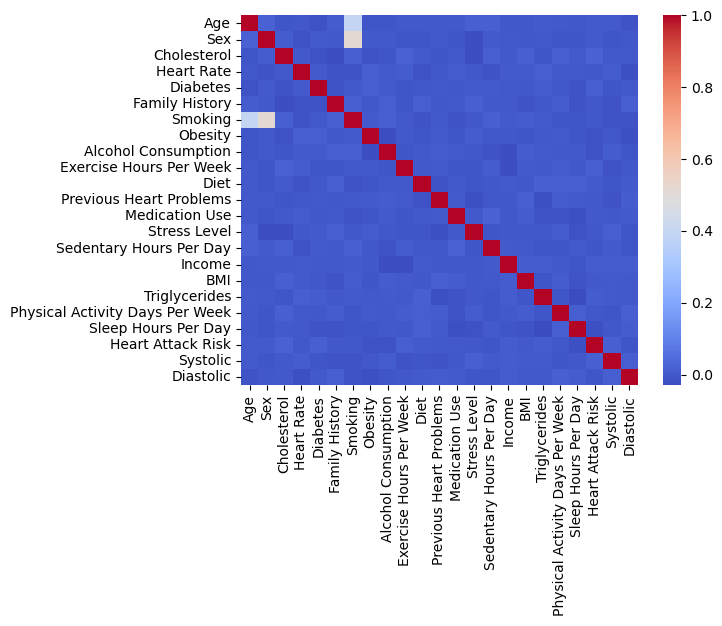

In [17]:
corr = df.corr()
sns.heatmap(corr,cmap = 'coolwarm',annot = False)

<Axes: >

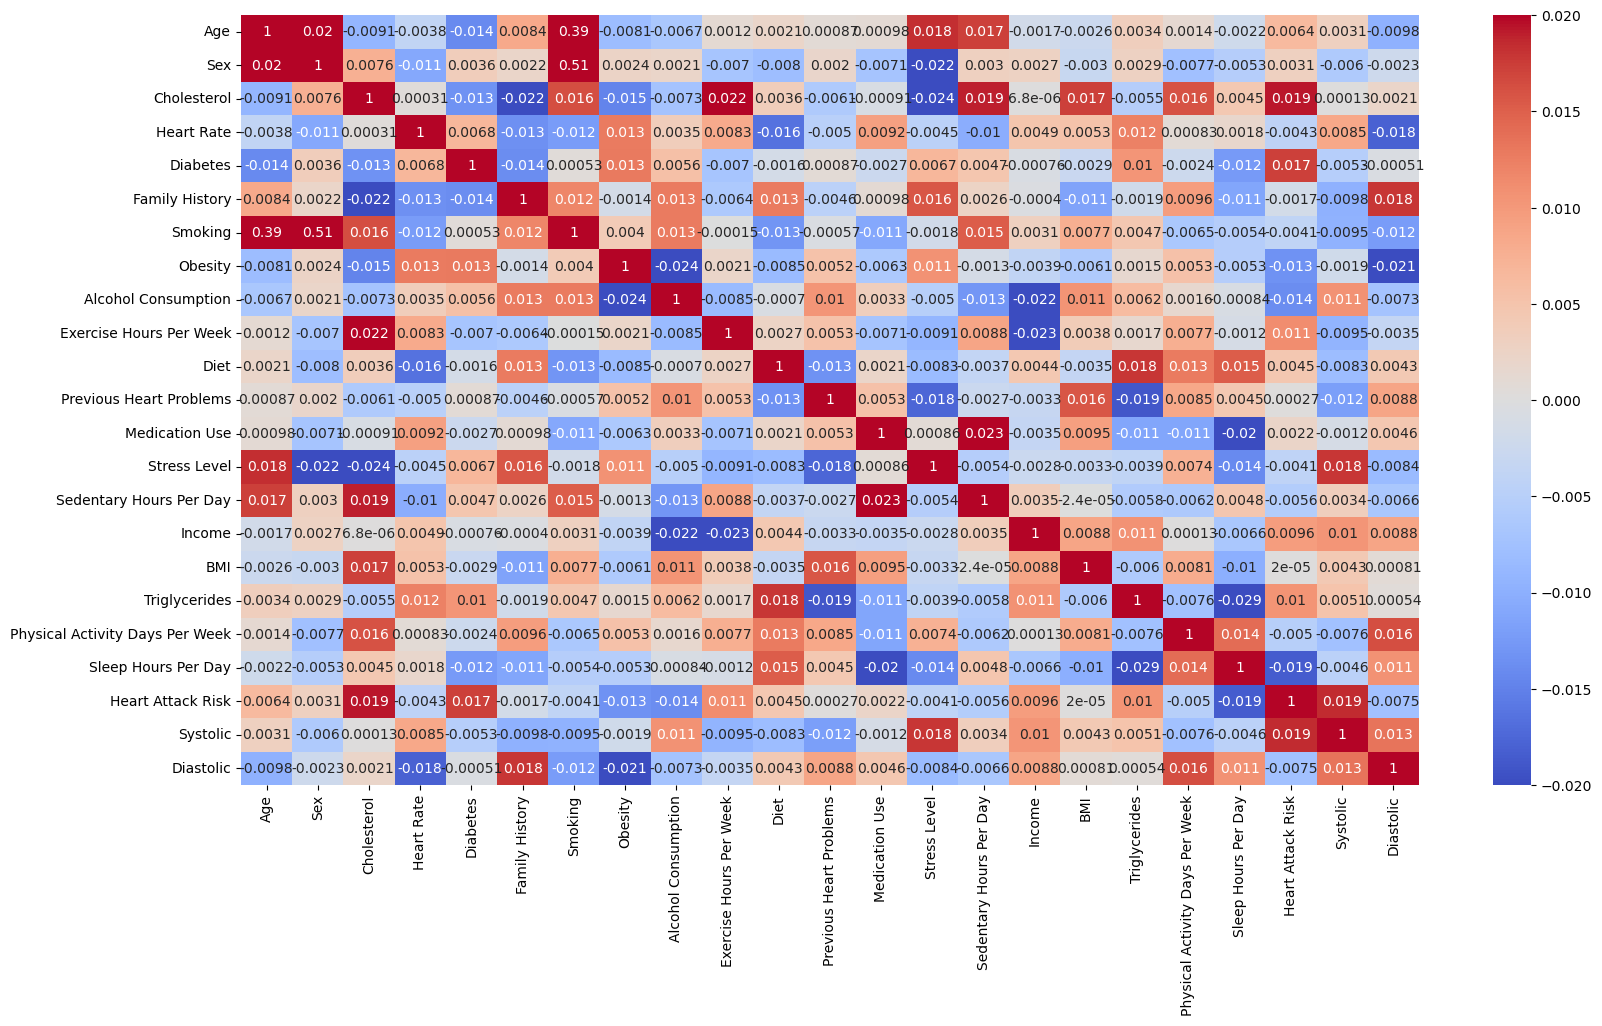

In [18]:
plt.figure(figsize = (19,10))
corelation=df.corr()
sns.heatmap(corelation, cmap="coolwarm",annot=True,vmin=-0.0200, vmax=0.0200)

In [19]:
## removing features with least correlations
corr['Heart Attack Risk'].sort_values()


Sleep Hours Per Day               -0.018528
Alcohol Consumption               -0.013778
Obesity                           -0.013318
Diastolic                         -0.007509
Sedentary Hours Per Day           -0.005613
Physical Activity Days Per Week   -0.005014
Heart Rate                        -0.004251
Stress Level                      -0.004111
Smoking                           -0.004051
Family History                    -0.001652
BMI                                0.000020
Previous Heart Problems            0.000274
Medication Use                     0.002234
Sex                                0.003095
Diet                               0.004540
Age                                0.006403
Income                             0.009628
Triglycerides                      0.010471
Exercise Hours Per Week            0.011133
Diabetes                           0.017225
Systolic                           0.018585
Cholesterol                        0.019340
Heart Attack Risk               

In [20]:
df = df.drop(columns = ['BMI','Previous Heart Problems'])

In [21]:
y = df['Heart Attack Risk']
X = df.drop(['Heart Attack Risk'],axis=1)
random_over_sampler = RandomOverSampler()
X , y = random_over_sampler.fit_resample(X,y)

In [46]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming X, y, and feature_names are defined
feature_names = X.columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Initialize the SVC model
svm_model = SVC(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters and print them
best_params_svm = grid_search_svm.best_params_
print(f'Best Parameters for SVM: {best_params_svm}')

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Initialize results dictionary
results_svm = {}

# Perform feature selection and model evaluation for different numbers of features
for k in range(1, X_train.shape[1] + 1):
    # Feature selection using mutual_info_classif
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    # Train the best SVM model
    best_svm_model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = best_svm_model.predict(X_test_selected)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results_svm[k] = {
        'Num Features': k,
        'Selected Features': [feature_names[i] for i in selector.get_support(indices=True)],
        'Confusion Matrix': cm,
        'Classification Report': report,
        'Accuracy': accuracy,
        'Classifier': 'Tuned SVM'
    }

# Print results
for k, result in results_svm.items():
    print(f'Number of Features: {result["Num Features"]}')
    print(f'Selected Features: {result["Selected Features"]}')
    print(f'Classifier: {result["Classifier"]}')
    print('Confusion Matrix:')
    print(result['Confusion Matrix'])
    print('\nClassification Report:')
    print(result['Classification Report'])
    print(f'\nAccuracy: {result["Accuracy"]:.4f}')
    print('-' * 40)

# Find the best number of features based on accuracy
best_num_features_svm = max(results_svm, key=lambda k: results_svm[k]['Accuracy'])
print(f'Best Number of Features for SVM: {best_num_features_svm}')

# Create a new SVM model with the best parameters
# Note: SVM does not have n_estimators, so we only set the best parameters
new_svm_model = SVC(**best_params_svm, class_weight='balanced', random_state=42)

# Refit the new model with the best number of features
selector = SelectKBest(score_func=mutual_info_classif, k=best_num_features_svm)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the new SVM model
new_svm_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = new_svm_model.predict(X_test_selected)

# Evaluate the new model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results for the new model
print(f'\nNew SVM Model with {best_num_features_svm} Features:')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(report)
print(f'\nAccuracy: {accuracy:.4f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Number of Features: 1
Selected Features: ['Income']
Classifier: Tuned SVM
Confusion Matrix:
[[767 914]
 [729 965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      1681
           1       0.51      0.57      0.54      1694

    accuracy                           0.51      3375
   macro avg       0.51      0.51      0.51      3375
weighted avg       0.51      0.51      0.51      3375


Accuracy: 0.5132
----------------------------------------
Number of Features: 2
Selected Features: ['Exercise Hours Per Week', 'Income']
Classifier: Tuned SVM
Confusion Matrix:
[[ 710  971]
 [ 676 1018]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      1681
           1       0.51      0.60      0.55      1694

    accu

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming X, y, and feature_names are defined
feature_names = X.columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters and print them
best_params_gb = grid_search_gb.best_params_
print(f'Best Parameters for Gradient Boosting: {best_params_gb}')

# Get the best model
best_gb_model = grid_search_gb.best_estimator_

# Initialize results dictionary
results_gb = {}

# Perform feature selection and model evaluation for different numbers of features
for k in range(1, X_train.shape[1] + 1):
    # Feature selection using mutual_info_classif
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    # Train the best Gradient Boosting model
    best_gb_model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = best_gb_model.predict(X_test_selected)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results_gb[k] = {
        'Num Features': k,
        'Selected Features': [feature_names[i] for i in selector.get_support(indices=True)],
        'Confusion Matrix': cm,
        'Classification Report': report,
        'Accuracy': accuracy,
        'Classifier': 'Tuned Gradient Boosting'
    }

# Print results
for k, result in results_gb.items():
    print(f'Number of Features: {result["Num Features"]}')
    print(f'Selected Features: {result["Selected Features"]}')
    print(f'Classifier: {result["Classifier"]}')
    print('Confusion Matrix:')
    print(result['Confusion Matrix'])
    print('\nClassification Report:')
    print(result['Classification Report'])
    print(f'\nAccuracy: {result["Accuracy"]:.4f}')
    print('-' * 40)

# Find the best number of features based on accuracy
best_num_features_gb = max(results_gb, key=lambda k: results_gb[k]['Accuracy'])
print(f'Best Number of Features for Gradient Boosting: {best_num_features_gb}')

# Create a new Gradient Boosting model with the best parameters
new_gb_model = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Refit the new model with the best number of features
selector = SelectKBest(score_func=mutual_info_classif, k=best_num_features_gb)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the new Gradient Boosting model
new_gb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = new_gb_model.predict(X_test_selected)

# Evaluate the new model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results for the new model
print(f'\nNew Gradient Boosting Model with {best_num_features_gb} Features:')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(report)
print(f'\nAccuracy: {accuracy:.4f}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Number of Features: 1
Selected Features: ['Income']
Classifier: Tuned Gradient Boosting
Confusion Matrix:
[[1018  663]
 [ 597 1097]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1681
           1       0.62      0.65      0.64      1694

    accuracy                           0.63      3375
   macro avg       0.63      0.63      0.63      3375
weighted avg       0.63      0.63      0.63      3375


Accuracy: 0.6267
----------------------------------------
Number of Features: 2
Selected Features: ['Exercise Hours Per Week', 'Income']
Classifier: Tuned Gradient Boosting
Confusion Matrix:
[[1010  671]
 [ 488 1206]]

Classification Report:
              precision    recall  f1-score   support

        

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your DataFrame and target variable
feature_names = X.columns.tolist()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and print them
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_rf_model = grid_search.best_estimator_

# Initialize results dictionary
results = {}

# Perform feature selection and model evaluation for different numbers of features
for k in range(1, X_train.shape[1] + 1):
    # Feature selection using mutual_info_classif
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    # Train the best RandomForestClassifier
    best_rf_model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = best_rf_model.predict(X_test_selected)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[k] = {
        'Num Features': k,
        'Selected Features': [feature_names[i] for i in selector.get_support(indices=True)],
        'Confusion Matrix': cm,
        'Classification Report': report,
        'Accuracy': accuracy,
        'Classifier': 'Tuned RandomForestClassifier'
    }

# Print results
for k, result in results.items():
    print(f'Number of Features: {result["Num Features"]}')
    print(f'Selected Features: {result["Selected Features"]}')
    print(f'Classifier: {result["Classifier"]}')
    print('Confusion Matrix:')
    print(result['Confusion Matrix'])
    print('\nClassification Report:')
    print(result['Classification Report'])
    print(f'\nAccuracy: {result["Accuracy"]:.4f}')
    print('-' * 40)

# Find the best number of features based on accuracy
best_num_features = max(results, key=lambda k: results[k]['Accuracy'])
print(f'Best Number of Features: {best_num_features}')

# Create a new RandomForestClassifier with the best parameters and increased number of estimators
best_params['n_estimators'] += 20
new_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Refit the new model with the best number of features
selector = SelectKBest(score_func=mutual_info_classif, k=best_num_features)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the new RandomForestClassifier
new_rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = new_rf_model.predict(X_test_selected)

# Evaluate the new model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results for the new model
print(f'\nNew Model with {best_num_features} Features and Increased Estimators:')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(report)
print(f'\nAccuracy: {accuracy:.4f}')

# Print selected feature names for the best model
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]
print(f'\nSelected Features for the Best Model: {selected_features}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Number of Features: 1
Selected Features: ['Exercise Hours Per Week']
Classifier: Tuned RandomForestClassifier
Confusion Matrix:
[[ 979  702]
 [ 392 1302]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1681
           1       0.65      0.77      0.70      1694

    accuracy                           0.68      3375
   macro avg       0.68      0.68      0.67      3375
weighted avg       0.68      0.68      0.67      3375


Accuracy: 0.6759
----------------------------------------
Number of Features: 2
Selected Features: ['Exercise Hours Per Week', 'Income']
Classifier: Tuned RandomForestClassifier
Confusion Matrix:
[[1099  582]
 [ 420 1274]]

Classification Report:
              precision    recall  f1-score   support

  

In [86]:
import pickle

# Assuming `model` is your trained classification model
with open('model.pkl', 'wb') as file:
    pickle.dump(new_rf_model, file)

print("Model saved as model.pkl")


Model saved as model.pkl


In [64]:
#['Age', 'Sex', 'Cholesterol', 'Smoking', 'Obesity', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'Triglycerides', 'Physical Activity Days Per Week', 'Systolic', 'Diastolic']

In [88]:
import pickle
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [92]:
X

,Age,Sex,Cholesterol,Smoking,Obesity,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,Triglycerides,Physical Activity Days Per Week,Systolic,Diastolic
0,67,1,208,1,0,4.168189,8,6.615001,261404,286,0,158,88
1,21,1,389,1,1,1.813242,0,4.963459,285768,235,1,165,93
2,21,0,324,0,0,2.078353,8,9.463426,235282,587,4,174,99
3,84,1,383,1,0,9.828130,8,7.648981,125640,378,3,163,100
4,66,1,318,1,1,5.804299,5,1.514821,160555,231,1,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,32,1,385,1,0,10.888745,9,8.592220,256077,772,3,112,88
11244,55,1,226,1,0,9.012184,5,8.953750,150017,613,4,98,88
11245,34,0,149,0,1,2.406812,9,7.114580,41621,416,1,95,77
11246,90,1,393,1,1,9.428205,5,2.021007,228711,175,1,119,102


In [94]:
new_rf_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)